# Assignment 2

### 1.1


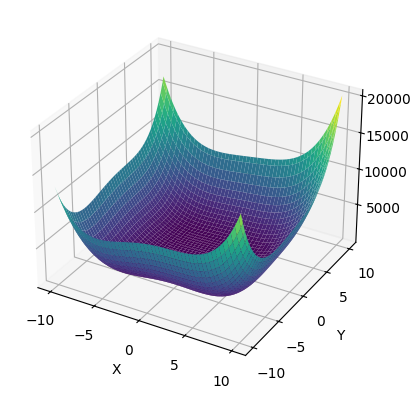

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Generate grid of points
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the function
fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
plt.show()

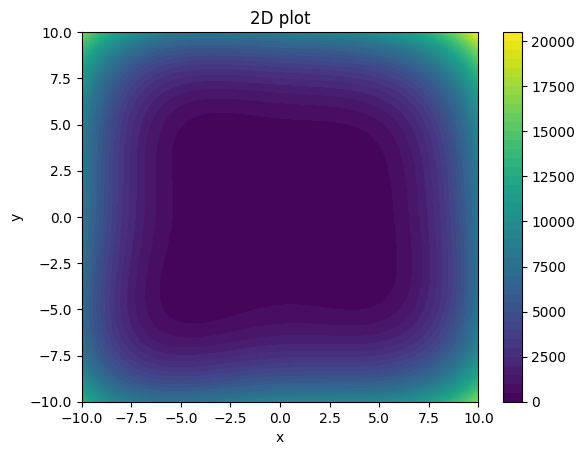

In [75]:
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title('2D plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

These plots indicate that he global minimun will be somewhere in the middle of the plot but will be impossible to confidently indicate visually. The global optima is more clearly visuallized with 4 peaks, where 1 is somewhat higher. So there will be 3 local optimas and 1 global optima.

### 1.2


Time used: 0.1324 seconds
X and Y: 2.9786057217136186, 2.01967397617517
Z: 0.015042579236385821


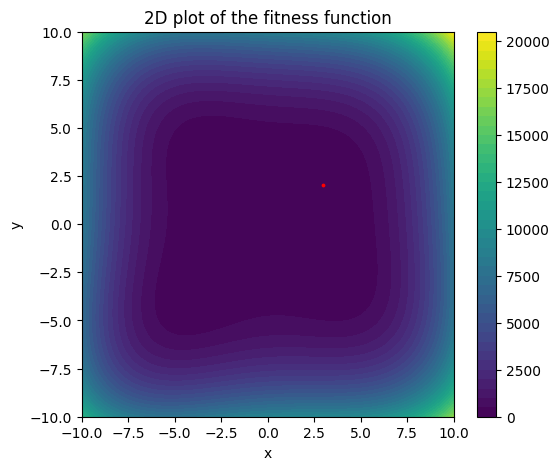

In [94]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time


populationSize = 10
generationAmount = 10000
crossChance = 0.5
mutationChance = 0.25

lowMutation = -10
highMutation = 10

solutions = []

def f(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def createPopulation(amount):
    pop = []
    # Generate random starting postitions
    for i in range(amount):
        element = (random.uniform(-10,10), random.uniform(-10,10))
        pop.append(element)

    return pop

#crossover function
def crossPopulation(amount, prevPopulation, crossPercent):

    newGen = []

    for i in range(0, amount, 2):
        parent1 = prevPopulation[i % len(prevPopulation)][1]
        parent2 = prevPopulation[(i + 1) % len(prevPopulation)][1]
        child1 = list(parent1)
        child2 = list(parent2)

        for j in range(len(child1)):
            crossChanceX = random.random()
            if crossChanceX < crossPercent:
                child1[0], child2[0] = child2[0], child1[0]
            crossChanceY = random.random()
            if crossChanceY < crossPercent:
                child1[1], child2[1] = child2[1], child1[1]
        newGen.append(tuple(child1))
        newGen.append(tuple(child2))
    return newGen

#mutation function
def mutatePoulation(prevPopulation, mutationPercent):
    newGen = []
    for e in prevPopulation:
        mutationChance = random.random()
        if mutationChance < mutationPercent:
            newGen.append((random.uniform(lowMutation,highMutation),random.uniform(lowMutation,highMutation)))
            continue
        newGen.append(e)
    return newGen

def rouletteWheel(prevPopulation):
    popChance = []
    invertedValue = calculateInvertedValue(prevPopulation)
    for e in prevPopulation:
        chance = (1/(e[0]+1))/invertedValue
        popChance.append(chance)

    draw = random.choices(prevPopulation,k=len(prevPopulation),weights=popChance)
    return draw

def calculateInvertedValue(prevPopulation):
    totalValue = 0
    for e in prevPopulation:
        value = e[0]
        totalValue += 1/(value+1)
    return totalValue

def generations(amount, population, crossover, mutation):
    populationSet = population
    best = (999999,(999999,(999999,999999)))
    for i in range(amount):

        rankedSolutions = []
        for elem in populationSet:
            rankedSolutions.append((f(elem[0],elem[1]),elem))
        
        # Gets the best results
        pickedSolutions = rouletteWheel(rankedSolutions)

        # Sorts the solutions to get the values closest to 0
        rankedSolutions.sort()

        if rankedSolutions[0][0] < best[1][0]:
            best = (i, rankedSolutions[0])

        # Crosses values based on the crossing probability
        populationSet = crossPopulation(populationSize,pickedSolutions,crossover)
        # Mutates the value based on the mutation probability
        populationSet = mutatePoulation(populationSet,mutation)
    solutions.append(best[1][1])
    #print(solutions)




# Create a grid of values for x and y
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot function in 2D
plt.figure(figsize=(6, 5))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title('2D plot of the fitness function')
plt.xlabel('x')
plt.ylabel('y')

time1 = time.perf_counter()
population = createPopulation(populationSize)
generations(generationAmount,population,crossChance,mutationChance)
#for i in range(1,100):
#    population = createPopulation(populationSize)
#    generations(generationAmount,population,crossChance,mutationChance)
time2 = time.perf_counter()

print(f"Time used: {time2 - time1:0.4f} seconds")
print(f"X and Y: {solutions[0][0]}, {solutions[0][1]}")
print(f"Z: {f(solutions[0][0],solutions[0][1])}")



points = np.array(solutions)
plt.scatter(points[:, 0], points[:, 1], color='red', marker='o', s=3)

plt.show()
#generations(generationAmount,population,crossChance,mutationChance)

In [80]:
import sympy as sp

# Number of iterations
iteration = 1000
learningRate = 0.001
# Stop the program if the distance between previous result and current result is lower than this value
stopCriteria = 0.00001
# Value used for print statements
stopped = False

#various starting positions to choose from
start1 = (0,0)
start2 = (1,5)
start3 = (-2,-2)
start4 = (-4,2)
startingPosition = start1

#Function was used to find the partial derivates, results hardcoded in derivative function
def findPartialDerivatives():
   
    x, y = sp.symbols('x y')


    f = (x**2 + y - 11)**2 + (x + y**2 - 7)**2

 
    f_x = sp.diff(f, x)  # Partial derivative of x
    f_y = sp.diff(f, y)  # Partial derivative of y

    # Display the results
    print("Partial derivative of x:")
    print(f_x)

    print("Partial derivative of y:")
    print(f_y)

def fitness(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def partialDerivativeX(x,y):
    return 4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14
    
def partialDerivativeY(x,y):
    return 2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22

findPartialDerivatives()

x = startingPosition[0]
y = startingPosition[1]
prevValue = fitness(x,y)
value = prevValue
        
# Loops the selected number of iterations
for i in range(iteration):
    # Finds a new x and y value
    newX = x - learningRate * partialDerivativeX(x,y)
    newY = y - learningRate * partialDerivativeY(x,y)
    # Sets the new x and y value after they both have been computed
    x = newX
    y = newY
    # Find the new fitness value
    value = fitness(x,y)
        
    # If the value from the previous iteration and this iteration are less than the selected stopping criteria, stop the program
    if (abs(prevValue-value)) < stopCriteria:
        print(f"Found the optimal local minima on iteration {i}")
        print(f"With the values x: {x}, y: {y} and f(x,y)={value}")
        stopped = True
        break
    prevValue = value
    
# If no optimal stopping point was found, say so here
if not stopped:
    print(f"After {iteration} iterations no optimal minima was found\n")
    print(f"The best values found was x: {x}, y: {y} and f(x,y)={value}")

Partial derivative of x:
4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14
Partial derivative of y:
2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22
Found the optimal local minima on iteration 230
With the values x: 2.998550447432179, y: 2.0034828905329203 and f(x,y)=0.0001832718546516557


### 1.4 

#### GA:
Population size 4 resulted generally in faster convergence than population size 10. In general, setting low numbers for generations, but high values for mutation chance and crossover chance drastically sped up the convergence but resulted in higher values for Z, which means a less accurate algorithm. On the other hand, increasing the generations and decreasing mutation and crossover increases time use but also results in much lower Z values.


#### GD:
For 3 of the 4 starting values, the optimal value was reached between iteration 100 and 200 when testing with 1000 iterations. 

Optimal configuration  that balances speed and accuracy should be learning rate 0.001 with 200 iterations.

For errors, learning rate 0.1 resulted in `OverflowError: (34, 'Result too large')` which could indicate the GD has overshot the target and is diverging to a point where it leads to overflow error due to too large values. 
Learning rate 0.000001 resulted in no optimal minima found after 1000 iterations which indicates that the learning rate is too small. 

### 2.1

The K-nearest neighbor classifies is a lazy classifier that works by approximating the classification of new data based on the proximity to existing data. It is called lazy because it is instance based and does not create a model. The role of the hyperparameter K is to define the number of neighbors that the alogorithm will look at when determining the class of new data. Too large K can increase accuracy but may lead to bias by including points "too far away" while a too small K will be more responsive to noise and outliers which increases bias. The distance metric is how the distance to the nearest neighbors are calculated. Euclidan distance is the standard way of calculating the distance because it simply measures the shortest path which is usually the most useful method. Manhattan distance is the absolute sum of differences which works better with grid values or higher dimensonalilty.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

# Sources:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit
# https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
# https://scikit-learn.org/stable/modules/model_evaluation.html
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# And Tutorial 3

# Variables used in the KNN classifier, k can be 1, 7, 15, and 31, distance can be Euclidean, Manhattan, or Chebyshev
k_list = [1,7,15,31]
distancelist = ["euclidean","manhattan"]

# Leser inn dataen fra CSV filen
train = pd.read_csv("train.csv",encoding="UTF-8")
test = pd.read_csv("test.csv",encoding="UTF-8")
Xtrain = train.drop('label', axis=1)
ytrain = train['label']
Xtest = test.drop('label', axis=1)
ytest = test['label']


ferrari = 0 #best F1 team aka best F1 score
bestinfo = ""

for k in k_list:
    for distance in distancelist:
        
        knn = KNeighborsClassifier(n_neighbors = k,  metric = distance)
        knn.fit(Xtrain,ytrain)
        #score = knn.score(Xtest,ytest)

        ypred = knn.predict(Xtest)

        accuracy = accuracy_score(ytest,ypred)
        precision = precision_score(ytest,ypred)
        recall = recall_score(ytest,ypred)
        f1 = f1_score(ytest,ypred)
        if f1 > ferrari:
            ferrari = f1    
            print("New best F1 score: {}".format(ferrari))
            bestinfo = ("Best values are: K value: " + str(k) + ", Distance metric: " + str(distance))
        #print("KNN Score: " + str(score))
        print("KNN Accuracy: " + str(accuracy))
        print("KNN Precicion: " + str(precision))
        print("KNN Recall: " + str(recall))
        print("KNN F1-score: " + str(f1))
        print("K value: " + str(k))
        print("Distance metric: " + str(distance))

print("Total best F1 score: {}".format(ferrari))
print(bestinfo)



New best F1 score: 0.3333333333333333
KNN Accuracy: 0.6
KNN Precicion: 1.0
KNN Recall: 0.2
KNN F1-score: 0.3333333333333333
K value: 1
Distance metric: euclidean
New best F1 score: 0.75
KNN Accuracy: 0.8
KNN Precicion: 1.0
KNN Recall: 0.6
KNN F1-score: 0.75
K value: 1
Distance metric: manhattan
KNN Accuracy: 0.8
KNN Precicion: 1.0
KNN Recall: 0.6
KNN F1-score: 0.75
K value: 7
Distance metric: euclidean
New best F1 score: 0.8888888888888888
KNN Accuracy: 0.9
KNN Precicion: 1.0
KNN Recall: 0.8
KNN F1-score: 0.8888888888888888
K value: 7
Distance metric: manhattan
KNN Accuracy: 0.7
KNN Precicion: 1.0
KNN Recall: 0.4
KNN F1-score: 0.5714285714285714
K value: 15
Distance metric: euclidean
KNN Accuracy: 0.9
KNN Precicion: 1.0
KNN Recall: 0.8
KNN F1-score: 0.8888888888888888
K value: 15
Distance metric: manhattan
KNN Accuracy: 0.7
KNN Precicion: 1.0
KNN Recall: 0.4
KNN F1-score: 0.5714285714285714
K value: 31
Distance metric: euclidean
KNN Accuracy: 0.6
KNN Precicion: 1.0
KNN Recall: 0.2
KNN 

In [24]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

# Sources:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit
# https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
# https://scikit-learn.org/stable/modules/model_evaluation.html
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# And Tutorial 3

# Variables used in the KNN classifier, k can be 1, 7, 15, and 31, distance can be Euclidean, Manhattan, or Chebyshev
k_list = [1,7,15,31]
distancelist = ["euclidean","manhattan"]

# Leser inn dataen fra CSV filen
train = pd.read_csv("train.csv",encoding="UTF-8")
test = pd.read_csv("test.csv",encoding="UTF-8")

scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
scaler.fit(test)
test = scaler.transform(test)

print(train)
print(test)

Xtrain = train.drop('label', axis=1)
ytrain = train['label']
Xtest = test.drop('label', axis=1)
ytest = test['label']




ferrari = 0 #best F1 team aka best F1 score
bestinfo = ""

for k in k_list:
    for distance in distancelist:
        
        knn = KNeighborsClassifier(n_neighbors = k,  metric = distance)
        knn.fit(Xtrain,ytrain)
        #score = knn.score(Xtest,ytest)

        ypred = knn.predict(Xtest)

        accuracy = accuracy_score(ytest,ypred)
        precision = precision_score(ytest,ypred)
        recall = recall_score(ytest,ypred)
        f1 = f1_score(ytest,ypred)
        if f1 > ferrari:
            ferrari = f1    
            print("New best F1 score: {}".format(ferrari))
            bestinfo = ("Best values are: K value: " + str(k) + ", Distance metric: " + str(distance))
        #print("KNN Score: " + str(score))
        print("KNN Accuracy: " + str(accuracy))
        print("KNN Precicion: " + str(precision))
        print("KNN Recall: " + str(recall))
        print("KNN F1-score: " + str(f1))
        print("K value: " + str(k))
        print("Distance metric: " + str(distance))

print("Total best F1 score: {}".format(ferrari))
print(bestinfo)

[[0.75634223 0.80542456 1.         0.53706146 0.7329439  1.
  0.83884941 1.        ]
 [0.40890036 0.51555644 0.6176257  0.43051756 0.26695784 0.3135596
  0.2787587  0.        ]
 [1.         0.7778159  0.59216712 0.82332834 0.29713822 0.80735298
  0.80083488 1.        ]
 [0.47018171 0.28311707 0.21748516 0.48884472 0.34832175 0.50213471
  0.43070188 0.        ]
 [0.60184869 0.48981518 0.58729852 0.82810997 0.87663664 0.43628466
  0.89967626 1.        ]
 [0.63304246 0.1914092  0.44812141 0.06441069 0.         0.43532845
  0.2980203  0.        ]
 [0.65210357 0.12469066 0.49373766 0.60135596 0.45301494 0.38198083
  0.38700492 0.        ]
 [0.65736229 0.86088509 0.53798378 0.86065173 1.         0.36884148
  0.98222338 1.        ]
 [0.74782006 0.16099695 0.70666249 0.2006846  0.20709887 0.43094038
  0.3291267  0.        ]
 [0.4628092  0.48373011 0.21145643 0.10817653 0.46921387 0.70511099
  0.42188844 0.        ]
 [0.40391287 0.53124572 0.43490809 0.42729772 0.46216877 0.71023357
  0.1398100

AttributeError: 'numpy.ndarray' object has no attribute 'drop'